<a href="https://colab.research.google.com/github/Rifat951/Depression-detection-using-Twitter-Dataset/blob/main/AML_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re


In [150]:
!pip install ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import ftfy

In [152]:
np.random.seed(1234)

DEPRES_NROWS = 3200  # number of rows to read from DEPRESSIVE_TWEETS_CSV
RANDOM_NROWS = 12000 # number of rows to read from RANDOM_TWEETS_CSV
MAX_SEQUENCE_LENGTH = 140 # Max tweet size
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 300
TRAIN_SPLIT = 0.6
TEST_SPLIT = 0.2
LEARNING_RATE = 0.1
EPOCHS= 10

In [153]:
df_processd = pd.read_csv("/content/twitter_processed_data.csv", sep = '|', header = None, nrows = DEPRES_NROWS)

##Display data

In [154]:
df_processd.head(5)

,0
0,989292962323615744|2018-04-25|23:59:57|Eastern...
1,989292959844663296|2018-04-25|23:59:56|Eastern...
2,989292951716155392|2018-04-25|23:59:54|Eastern...
3,989292873664393218|2018-04-25|23:59:35|Eastern...
4,989292856119472128|2018-04-25|23:59:31|Eastern...


In [155]:
#naming the column
df_processd.columns = ["Text"]

In [156]:
df_processd.head()

,Text
0,989292962323615744|2018-04-25|23:59:57|Eastern...
1,989292959844663296|2018-04-25|23:59:56|Eastern...
2,989292951716155392|2018-04-25|23:59:54|Eastern...
3,989292873664393218|2018-04-25|23:59:35|Eastern...
4,989292856119472128|2018-04-25|23:59:31|Eastern...


In [157]:
## split the column into sub-columns and visualize the data properly

df_processed_col = df_processd.Text.str.split(pat='|',n = 6, expand=True)
df_processed_col.head(10)

,0,1,2,3,4,5,6
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,"1|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,"
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,"1|0|2|,,,,,,,,,,,,,,,,,,,,,,,,,"
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,"0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,"
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,"1|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,"
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,"0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,"
5,989292843125616641,2018-04-25,23:59:28,Eastern Standard Time,PHOTOGPRODIG,my anxiety and my depression fighting over who...,"0|0|2|,,,,,,,,,,,,,,,,,,,,,,,,,"
6,989291000911642625,2018-04-25,23:52:09,Eastern Standard Time,sp4cecounty,wow she's suddenly cured my depression and gav...,"0|2|9|,,,,,,,,,,,,,,,,,,,,,,,,,"
7,989290997346643968,2018-04-25,23:52:08,Eastern Standard Time,sassi_klassi,"I am officially done with @kanyewest. him, the...","0|0|0|,,,,,,,,,,,,,,,,,,,,,"
8,989290972973600770,2018-04-25,23:52:02,Eastern Standard Time,therealazukaobi,Me: what's wrong?My girl: *looks up at me with...,"0|0|2|#examseason,,,,,,,,,,,,,,,,,,,,,,,,,"
9,989290951012044800,2018-04-25,23:51:57,Eastern Standard Time,KateSusabu,@AusBorderForce @PeterDutton_MP @shanebazzi Ag...,"0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,"


In [158]:
df_processed_col.columns = ["Twitter_Id", "Date", "Time", "Time_Zone", "User_Id", "Tweet", "Rating"]

In [159]:
df_processed_col.head()

,Twitter_Id,Date,Time,Time_Zone,User_Id,Tweet,Rating
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,"1|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,"
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,"1|0|2|,,,,,,,,,,,,,,,,,,,,,,,,,"
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,"0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,"
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,"1|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,"
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,"0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,"


In [160]:
df_processed_col.to_csv('processed_csv.csv')

In [161]:
## value.counts() gets us the unique values in our dataset
df_processed_col["Tweet"].value_counts()

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCE                                                                                                                                                                                            15
1-800-273-8255 - Suicide Hotline877-226-3111 - Addiction Hotline844-228-2962 - Eating Disorder Hotline877-455-0628 - Self Harm Hotline888-640-5174 - Depression HotlineShare this for someone who might really need these phone numbers right now.                                     5
According to a new study ketamine has fast-acting benefits for depression:  http://www.bbc.co.uk/news/health-43753073 …                                                                                                                                                                5
Depression sucks                                                                                                                                             

In [162]:
display_of_unique_val = df_processed_col['Tweet'].value_counts()/df_processed_col.shape[0]*100
print('Shape of Dataset -> ' , df_processed_col.shape)

Shape of Dataset ->  (3200, 7)


In [163]:
display_of_unique_val.to_csv('display_data.csv')

In [177]:
df_new = pd.read_csv("/content/dsiplay_data.csv", header = None)
df_new.columns = ["Text", "Unique_Val"]
df_new.head()

,Text,Unique_Val
0,"Mom's depression tied to kids' emotional, inte...",0.46875
1,1-800-273-8255 - Suicide Hotline877-226-3111 -...,0.15625
2,According to a new study ketamine has fast-act...,0.15625
3,Depression sucks,0.09375
4,Lonely millennials twice as likely to experien...,0.09375


In [220]:
df_disp = df_new["Unique_Val"].value_counts()
df_disp.head()

0.03125    3131
0.06250      19
0.15625       2
0.09375       2
0.46875       1
Name: Unique_Val, dtype: int64

In [191]:
df_disp_ori = df_processed_col["Tweet"].value_counts()
df_disp_ori.to_csv('new_disp.csv')  

In [209]:
df_disp1 = pd.read_csv("/content/new_disp.csv", header = None)
df_disp1.columns = ["Text", "Val"]    
df_disp1.head()

,Text,Val
0,"Mom's depression tied to kids' emotional, inte...",15
1,1-800-273-8255 - Suicide Hotline877-226-3111 -...,5
2,According to a new study ketamine has fast-act...,5
3,Depression sucks,3
4,Lonely millennials twice as likely to experien...,3


In [210]:
df_disp1 = df_disp1["Val"].value_counts()
df_disp1.head()

1     3131
2       19
5        2
3        2
15       1
Name: Val, dtype: int64

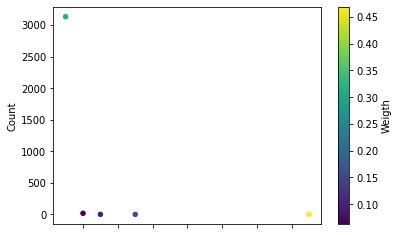

In [228]:
df = pd.DataFrame([[1, 3131, 0.3125], [2, 19, 0.06250], [5, 2, 0.15625],[3, 2, 0.09375], [15, 1, 0.46875]],columns=['UniqueVal', 'Count', 'Weigth'])
#[[3131, 1, 0.3125], [19, 2, 0.06250], [2, 5, 0.15625],[2, 3, 0.09375], [1, 15, 0.46875]]
ax2 = df.plot.scatter(x='UniqueVal',y='Count', c='Weigth',colormap='viridis')

In [263]:
#drop some columns with person info and which are not required to give data more clarity

df_process_red_col = df_processed_col.drop(["Twitter_Id", "Date", "Time", "Time_Zone", "User_Id"], axis = 1)


In [264]:
df_process_red_col.head()

,Tweet,Rating
0,The lack of this understanding is a small but significant part of what causes anxiety & depression to both feel so incredibly lonely. It's soooo easy to compare. It's so easy to invalidate ourselves because of that.,"1|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,"
1,i just told my parents about my depression and it's so hard to get gen x people to understand that this is not something that i can control all the time or just cure with a walk or by keeping my mind busy,"1|0|2|,,,,,,,,,,,,,,,,,,,,,,,,,"
2,"depression is something i don't speak about even going through it because it's also such a double edged sword. i love every race. even if white people had done so much i can't hate them all. my grandma is legit white! how tf can i hate, i do dislike people though.","0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,"
3,Made myself a tortilla filled with pb&j. My depression is cured. Olivia:1 depression:0,"1|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,"
4,"@WorldofOutlaws I am gonna need depression meds soon, these rainouts are spinning my equilibrium out <Emoji: Pouting face> Mother Nature is being a mean B-T-H <Emoji: Face with symbols over mouth>","0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,"


In [265]:
#usually in twitter dataset some words are in short form
#we are looking to expand them

# Expand Contraction
wordList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(wordList.keys()))

In [266]:
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [267]:
def expandContractions(text, c_re=c_re):
    def replace(match):
        return wordList[match.group(0)]
    return c_re.sub(replace, text)

In [268]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 10:
            # remove hashtag, @mention, emoji and image URLs
            tweet = ' '.join(
                re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())

            # fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)

            # expand contraction
            tweet = expandContractions(tweet)

            # remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            # stop words
            stop_words = set(stopwords.words('english'))
            word_tokens = nltk.word_tokenize(tweet)
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            # stemming words
            tweet = PorterStemmer().stem(tweet)

            cleaned_tweets.append(tweet)

            print(tweets)

    return cleaned_tweets

In [269]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

df['A'] = df['A'].apply(add_2)
print (df)

# or #

df['A'].transform(add_2)
print (df)

In [301]:
## apply the clean tweets into our dataframe and store it to another value to access it later on
df_preprocessed_data = df_process_red_col.apply(clean_tweets)

Streaming output truncated to the last 5000 lines.
4                                                                                     @WorldofOutlaws I am gonna need depression meds soon, these rainouts are spinning my equilibrium out <Emoji: Pouting face> Mother Nature is being a mean B-T-H <Emoji: Face with symbols over mouth>
                                                                                                                                               ...                                                                                                                                        
3195                                                                                                                                                 Me: I can handle post-grad depression I'm already depressed.Me the literal first day after my last final:  pic.twitter.com/d2o1EBun7G
3196                                                                            Or maybe because she

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
                                                                                                                                               ...                                                                                                                                        
3195                                                                                                                                                 Me: I can handle post-grad depression I'm already depressed.Me the literal first day after my last final:  pic.twitter.com/d2o1EBun7G
3196                                                                            Or maybe because she studied about depression. I dunno. Now that both me and my brother has it. And also we have sinus. Are we twins? Lol. Tapi financial belum sama lagi. <Emoji: Face with tears of joy>
3197                                                                                               j

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
4        0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,
                     ...               
3195    0|0|6|,,,,,,,,,,,,,,,,,,,,,,,,,
3196    0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,
3197    0|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,
3198     1|0|1|,,,,,,,,,,,,,,,,,,,,,,,,
3199      0|0|0|,,,,,,,,,,,,,,,,,,,,,,,
Name: Rating, Length: 3200, dtype: object
0       1|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,
1       1|0|2|,,,,,,,,,,,,,,,,,,,,,,,,,
2        0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,
3       1|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,
4        0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,
                     ...               
3195    0|0|6|,,,,,,,,,,,,,,,,,,,,,,,,,
3196    0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,,
3197    0|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,
3198     1|0|1|,,,,,,,,,,,,,,,,,,,,,,,,
3199      0|0|0|,,,,,,,,,,,,,,,,,,,,,,,
Name: Rating, Length: 3200, dtype: object
0       1|0|3|,,,,,,,,,,,,,,,,,,,,,,,,,
1       1|0|2|,,,,,,,,,,,,,,,,,,,,,,,,,
2        0|0|0|,,,,,,,,,,,,,,,,,,,,,,,,
3       1|0|0|,,,,,,,,,,,

In [302]:
df_preprocessed_data.head(10)

,Tweet,Rating
0,the lack understanding small significant part causes anxiety depression feel incredibly lonely it soooo easy compare it easy invalid,1 0 3
1,told parents depression hard get gen x people understand something control time cure walk keeping mind busi,1 0 2
2,depression something speak even going also double edged sword love every race even white people done much hate grandma legit white tf hate dislike people though,0 0 0
3,made tortilla filled pb j my depression cured olivia 1 depression 0,1 0 0
4,i gon na need depression meds soon rainouts spinning equilibrium,0 0 0
5,anxiety depression fighting whos day https twitter com crissles status 988218861697806336,0 0 2
6,wow suddenly cured depression gave us world peace https twitter com bearfaceingtons status 989289124883566593,0 2 9
7,i officially done neptunes justin timberlake timbaland got depression i younger lot artist changed sounds i still supported far,0 0 0
8,me wrong my girl looks look depression stress face me bab,0 0 2
9,mp agreed as someone long experience clinical depression i would like add of course fuckingwell yells hits head wall says wants dienobody live forever without hopeshe get better kept indefinitely nauru,0 0 0


#Using another dataset for pretrained data

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import gc
import json
from keras_preprocessing.text import tokenizer_from_json
from keras.models import model_from_json

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)

In [234]:
twitter = pd.read_csv('/content/Sentiment Analysis Dataset 2_short.csv', skiprows=[8835,535881] , usecols = ['Sentiment' , 'SentimentText'])
twitter = twitter.rename(columns = {'Sentiment': 'sentiment' , 'SentimentText':'reviews'})
display(twitter['sentiment'].value_counts()/twitter.shape[0]*100)
print('Shape of Dataset -> ' , twitter.shape)
display(twitter.sample(6))

1    55.092039
0    44.907961
Name: sentiment, dtype: float64

Shape of Dataset ->  (842305, 2)


,sentiment,reviews
438237,1,@susan_boyle great feature about you on CBS Sunday morning. You sound incredible
154897,1,@ddlovato What is your favorite movie?
546486,0,@vixyash sowwee
760996,0,homework madness time!
556395,1,"@_Lauren_Mallory Trust me, we will have lots of fun It will be great, we have all day to learn how *smiles reassuring*"
705983,0,ewwwwwwwwww! tommorows monday!


In [238]:
data = pd.concat([twitter ], axis= 0)
del twitter
gc.collect()

171

In [240]:
print(data.shape)
display(data.sample(5))
data['sentiment'].value_counts()/data.shape[0]*100

(842305, 2)


,sentiment,reviews
341300,1,@lolitacarrico It's going to be pretty epic. Drink a lot of water before; I totally have plans for you and your liver.
363948,0,@mileycyrus awww that's so sad - im just a fan from canada haha
618353,1,Awesome new hair cut @Urban_Lindsay http://twitpic.com/6pix0
68805,0,@bsneed23 LOL! Lucky you... I don't know why I can't sleep I have to be up at like 8 I'm gonna be so tired.
484402,1,"@withoutmyhat Et DM Stith, tu as rï¿½ï¿½coutï¿½ DM Stith? Je te lï¿½cherais pas sinon..."


1    55.092039
0    44.907961
Name: sentiment, dtype: float64

In [236]:
data = data.sample(frac= 0.05 , random_state = 10)


In [241]:
from spacy.lang.en.stop_words import STOP_WORDS
# stop_words = stopwords.words("english")
stop_words = STOP_WORDS
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|<.*?>|[^A-Za-z0-9]+"
Emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(Emoji_pattern, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [242]:
data.reviews = data.reviews.apply(lambda x: preprocess(x))

In [243]:
data.head(5)

,sentiment,reviews
0,0,sad apl friend
1,0,missed new moon trailer
2,1,omg 7 30 o
3,0,omgaga im sooo im gunna cry ve dentist 11 suposed 2 crown 30mins
4,0,think mi bf cheating t t


In [245]:
documents = [_text.split() for _text in data.reviews] 

In [249]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 20
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


w2v_model.build_vocab(documents)

In [250]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 23202


In [251]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(96422663, 113765680)

In [254]:
w2v_model.most_similar(positive=['sad'],topn=100)

[('depressed', 0.5367159843444824),
 ('sadder', 0.5319044589996338),
 ('upset', 0.5215713977813721),
 ('bummed', 0.5065473318099976),
 ('sadd', 0.4605398178100586),
 ('homesick', 0.44212114810943604),
 ('unhappy', 0.42027443647384644),
 ('pissed', 0.41467535495758057),
 ('disappointed', 0.412720263004303),
 ('cry', 0.3846871852874756),
 ('bittersweet', 0.38436514139175415),
 ('lonely', 0.3819217085838318),
 ('heartbroken', 0.3794976770877838),
 ('devastated', 0.37717515230178833),
 ('upsetting', 0.37066057324409485),
 ('angry', 0.35624948143959045),
 ('mad', 0.35605812072753906),
 ('depressing', 0.3549348711967468),
 ('dissapointed', 0.35225728154182434),
 ('sadddd', 0.34262555837631226),
 ('cried', 0.34099891781806946),
 ('gutted', 0.3404689133167267),
 ('saaad', 0.3373940885066986),
 ('sadness', 0.3356221914291382),
 ('happier', 0.33284085988998413),
 ('crying', 0.33243656158447266),
 ('saddest', 0.3307594358921051),
 ('bad', 0.3216233253479004),
 ('disappointing', 0.3210790157318115

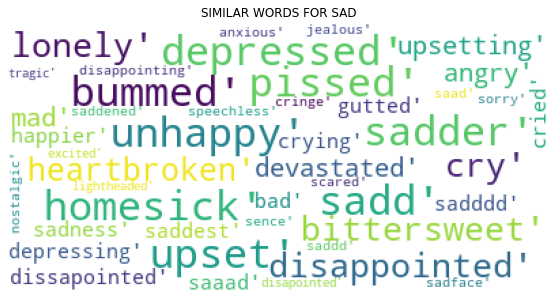

In [257]:
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str([x[0] for x in w2v_model.most_similar("sad",topn=100)]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("SIMILAR WORDS FOR SAD")
plt.show()

In [258]:
w2v_model.most_similar(positive=['depression'],topn=100)

[('migraines', 0.4639222025871277),
 ('relief', 0.40097561478614807),
 ('stress', 0.39868903160095215),
 ('syndrome', 0.3742222785949707),
 ('illness', 0.3692029118537903),
 ('nausea', 0.36458343267440796),
 ('sickness', 0.35692083835601807),
 ('suffering', 0.35477137565612793),
 ('headaches', 0.3545505404472351),
 ('anxiety', 0.3542185425758362),
 ('asthma', 0.3503835201263428),
 ('empathy', 0.3503713309764862),
 ('cramp', 0.34926050901412964),
 ('boredom', 0.3479856848716736),
 ('hormones', 0.34496092796325684),
 ('impact', 0.3445577621459961),
 ('delicate', 0.341001033782959),
 ('angst', 0.34062105417251587),
 ('medication', 0.3401906490325928),
 ('cramps', 0.339329332113266),
 ('condition', 0.33717137575149536),
 ('migraine', 0.3360165059566498),
 ('hiccups', 0.33576837182044983),
 ('consequences', 0.330818235874176),
 ('humanity', 0.32956692576408386),
 ('blues', 0.3290398418903351),
 ('tension', 0.32556384801864624),
 ('allergy', 0.32383251190185547),
 ('eczema', 0.32380804419517

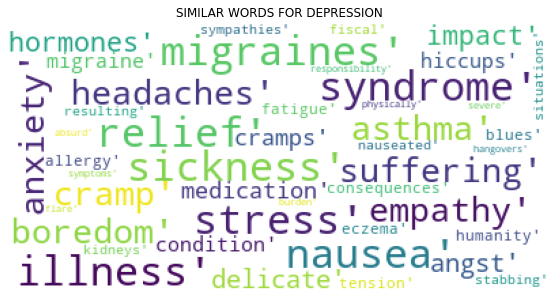

In [259]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str([x[0] for x in w2v_model.most_similar("depression",topn=100)]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("SIMILAR WORDS FOR DEPRESSION")
plt.show()

In [304]:
print(df_preprocessed_data.shape)

(3200, 2)


In [305]:
data1 = pd.concat([df_preprocessed_data], axis= 0)
#del df_preprocessed_data
gc.collect()

1011

In [306]:
print(data1.shape)
display(data1.sample(5))
data1['Rating'].value_counts()/data.shape[0]*100

data1 = data1.sample(frac= 0.05 , random_state = 10)
data1.Tweet = data1.Tweet.apply(lambda x: preprocess(x))

(3200, 2)


,Tweet,Rating
2160,bring post festival depress,0 0 13
1164,puffy face swollen eyelids particularly bags eyes despite getting enough sleep swelling feet legs hands muscle joint pain muscle weakness depression insomnia low body temperatur,0 0 0
1098,if hate job everyday making least 20 hour a fucking quitb shut fuck itc talk therapist depress,1 0 3
153,blood test anxiety depression https goo gl hbbk7m anxiety dosag,0 0 2
2664,i enough god damn bad days good weeks i living matter 5 years spend 5 minutes i so depression shit taking charg,1 0 1


In [307]:
data1.head()

,Tweet,Rating
924,depress,0 0 0
1284,life depress,0 0 0
2126,depression works lot ppl,0 0 0
1161,blaming anxiety depression lack spirituality offens,0 0 1
1365,awso turned depression cur,1 0 3


In [308]:
documents = [_text.split() for _text in df_preprocessed_data.Tweet] 

In [309]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 20
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


w2v_model.build_vocab(documents)

In [310]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 826


In [311]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(492132, 979660)

In [312]:
w2v_model.most_similar(positive=['sad'],topn=100)

[('saying', 0.9966320395469666),
 ('lot', 0.9944526553153992),
 ('away', 0.9941245317459106),
 ('gets', 0.9940454959869385),
 ('that', 0.9931434392929077),
 ('ur', 0.9929462671279907),
 ('trying', 0.9927130937576294),
 ('hard', 0.992109477519989),
 ('got', 0.9918888807296753),
 ('keep', 0.9912794828414917),
 ('hope', 0.9900702238082886),
 ('dont', 0.98943030834198),
 ('always', 0.9885234832763672),
 ('honestly', 0.9880110025405884),
 ('probably', 0.9880049228668213),
 ('bc', 0.9878522753715515),
 ('something', 0.9876559972763062),
 ('okay', 0.9876077771186829),
 ('comes', 0.9871251583099365),
 ('right', 0.9870200753211975),
 ('making', 0.9863153696060181),
 ('hate', 0.9862494468688965),
 ('bett', 0.9859001636505127),
 ('thank', 0.9857824444770813),
 ('say', 0.9846369028091431),
 ('working', 0.9842956066131592),
 ('bad', 0.984135627746582),
 ('bitch', 0.983909010887146),
 ('know', 0.9839072823524475),
 ('back', 0.9836920499801636),
 ('happy', 0.9832111597061157),
 ('done', 0.98312222957

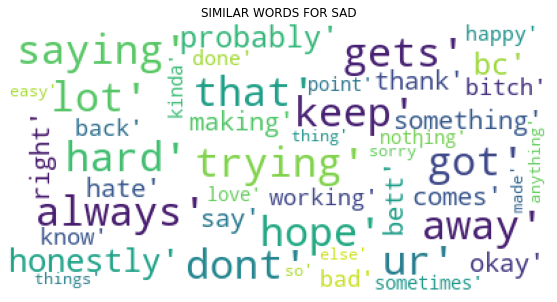

In [313]:
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str([x[0] for x in w2v_model.most_similar("sad",topn=100)]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("SIMILAR WORDS FOR SAD")
plt.show()

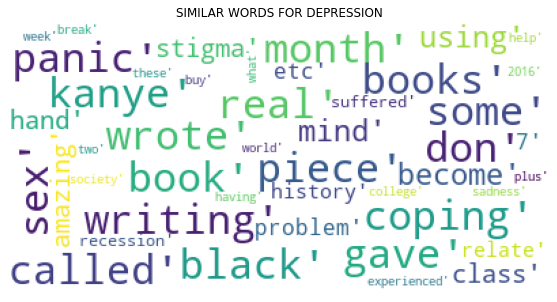

In [314]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str([x[0] for x in w2v_model.most_similar("depression",topn=100)]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("SIMILAR WORDS FOR DEPRESSION")
plt.show()